# 3. Manipuler les colonnes

## Manipuler des colonnes
```python
# Renomme les colonnes
df.columns = ['nouv_nom_col_A', 'nouv_nom_col_B']

# Modifie l'ordre des colonnes, permet aussi d'en supprimer
df = df[['nom_colonne_B', 'nom_colonne_A', 'nom_colonne_C']]

# Retourne un dataframe sans la colonne indiquée
df.drop('nom_colonne', axis=1)

# Fonctionne aussi avec une liste
df.drop(['nom_colonne_A', 'nom_colonne_B'] axis=1)
```

## Créer des colonnes
```python
# Crée une colonne avec la valeur donnée pour chaque ligne
df['nouv_colonn'] = valeur

# Remplit la colonne avec les valeurs de la liste, mais il faut qu'il y en ait le même nombre que de lignes
df['nouv_colonn'] = [val_1, val_2, val_3] 

# Concatène les valeurs des deux colonnes dans une nouvelles (si ce sont des caractères)
df['nouv_colonn'] = df['nom_col_A'] + df['nom_col_B']
```

## Modifier le type de donnée d'une colonne
```python
# Retourne le type d'une colonne
df['Creation Date'].dtype

# Modifie le type d'une colonne en date
df['Col_Date'] = dg['Col_Date'].astype(np.datetime64)

# Modifie le type d'une colonne en date
df['Col_Date'] = pd.to_datetime(dg['Col_Date']) 
```

## Dessiner un diagramme en secteurs
```python
# Dessine le diagramme
plt.pie(x=liste_des_valeurs, labels=liste_etiquettes_des_valeurs, autopct='%.1f%%')

# Ajoute un titre au diagramme
plt.title('Titre', fontsize=16)
```

In [3]:
# Importer les bibliothèques essentielles
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher toutes les colonnes
pd.set_option('display.max_columns', None)

In [4]:
# Chargement des données
df = pd.read_csv('Data/items_reduced.csv', dtype=str)

In [5]:
# Affichage des dix premières lignes
df.head(10)

,Barcode,MMS ID,Holdings ID,Permanent Location,Call Number,Material Type,Item Policy,Title
0,HPH000001003,991000787439705520,2235648890005520,BE HEP Appareils,HEPBE,Equipment,"97 Booking / Loan max. 14 days, campus, no copy",Micro stéréo mini-jack : Rode : VideoMicro
1,HPH000001004,991000787439705520,2235648890005520,BE HEP Appareils,HEPBE,Equipment,"97 Booking / Loan max. 14 days, campus, no copy",Micro stéréo mini-jack : Rode : VideoMicro
2,HPH000001005,991000787439705520,2235648890005520,BE HEP Appareils,HEPBE,Equipment,"97 Booking / Loan max. 14 days, campus, no copy",Micro stéréo mini-jack : Rode : VideoMicro
3,03138226,991000065799705520,22106499280005520,BE HEP Séries de livres,HEPBE 6 VEND,Book,"54 Booking 56 days / No loan request, loan 28 ...",La disparition de Sam Edward van de Vendel ; t...
4,03138420,991001610643905520,22106459710005520,BE HEP Littérature jeunesse,HEPBE COLO,Book,01 Loan 28 days,Les pêcheurs d'éternité Marie Colot ; illustra...
5,03140943,991001604441405520,22106459620005520,BE HEP Jeux,HEPBE MATH TURI,Game,"04 Loan 28 days, no copy",Turing tumble construis un ordinateur à billes...
6,03140944,991001604441405520,22106459620005520,BE HEP Jeux,HEPBE MATH TURI,Game,"04 Loan 28 days, no copy",Turing tumble construis un ordinateur à billes...
7,03137107,991001610343705520,22106419560005520,BE HEP Fonds documentaire,HEPBE 745.5HAYE,Book,01 Loan 28 days,40 créations avec la nature Fiona Hayes
8,03138415,991001609741405520,22106353530005520,BE HEP Littérature jeunesse,HEPBE BD MAUR,Book,01 Loan 28 days,Eden scénario : Fabrice Colin ; dessin et coul...
9,03138416,991001609741405520,22106353530005520,BE HEP Littérature jeunesse,HEPBE BD MAUR,Book,01 Loan 28 days,Eden scénario : Fabrice Colin ; dessin et coul...


## Réordonner et renommer les colonnes

In [6]:
df.columns

Index(['Barcode', 'MMS ID', 'Holdings ID', 'Permanent Location', 'Call Number',
       'Material Type', 'Item Policy', 'Title'],
      dtype='object')

In [7]:
# Réordonner les colonnes
dg = df[['Title', 'Permanent Location', 'Call Number',
       'Barcode', 'Material Type']].copy()

In [8]:
dg.columns

Index(['Title', 'Permanent Location', 'Call Number', 'Barcode',
       'Material Type'],
      dtype='object')

In [9]:
# Renommer les colonnes
dg.columns = ['Titre', 'Emplacement', 'Cote', 'Code-barres', 'Type de ressource']
dg.head()

,Titre,Emplacement,Cote,Code-barres,Type de ressource
0,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001003,Equipment
1,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001004,Equipment
2,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001005,Equipment
3,La disparition de Sam Edward van de Vendel ; t...,BE HEP Séries de livres,HEPBE 6 VEND,03138226,Book
4,Les pêcheurs d'éternité Marie Colot ; illustra...,BE HEP Littérature jeunesse,HEPBE COLO,03138420,Book


## Créer une nouvelle colonne

In [ ]:
# Créer une nouvelle colonne avec le nombre d'exemplaire, ici 1 vu que chaque ligne représente un exemplaire
dg['Nb exemplaires'] = 1

In [11]:
# Créer une colonne à partir des données d'autres colonnes
# Exemple pour créer une colonne qui concatène la cote et l'emplacement
dg['Emplacement - cote'] = dg['Emplacement']
dg.head()

,Titre,Emplacement,Cote,Code-barres,Type de ressource,Emplacement - cote
0,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001003,Equipment,BE HEP Appareils
1,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001004,Equipment,BE HEP Appareils
2,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001005,Equipment,BE HEP Appareils
3,La disparition de Sam Edward van de Vendel ; t...,BE HEP Séries de livres,HEPBE 6 VEND,03138226,Book,BE HEP Séries de livres
4,Les pêcheurs d'éternité Marie Colot ; illustra...,BE HEP Littérature jeunesse,HEPBE COLO,03138420,Book,BE HEP Littérature jeunesse


In [12]:
# Ajout de ' / ' à chaque valeur de la colonne
dg['Emplacement - cote'] += ' / '
dg.head()

,Titre,Emplacement,Cote,Code-barres,Type de ressource,Emplacement - cote
0,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001003,Equipment,BE HEP Appareils /
1,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001004,Equipment,BE HEP Appareils /
2,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001005,Equipment,BE HEP Appareils /
3,La disparition de Sam Edward van de Vendel ; t...,BE HEP Séries de livres,HEPBE 6 VEND,03138226,Book,BE HEP Séries de livres /
4,Les pêcheurs d'éternité Marie Colot ; illustra...,BE HEP Littérature jeunesse,HEPBE COLO,03138420,Book,BE HEP Littérature jeunesse /


In [14]:
# Ajout de la cote à la fin du champ
dg['Emplacement - cote'] += dg['Cote']
dg.head()

,Titre,Emplacement,Cote,Code-barres,Type de ressource,Emplacement - cote
0,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001003,Equipment,BE HEP Appareils / HEPBE
1,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001004,Equipment,BE HEP Appareils / HEPBE
2,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001005,Equipment,BE HEP Appareils / HEPBE
3,La disparition de Sam Edward van de Vendel ; t...,BE HEP Séries de livres,HEPBE 6 VEND,03138226,Book,BE HEP Séries de livres / HEPBE 6 VEND
4,Les pêcheurs d'éternité Marie Colot ; illustra...,BE HEP Littérature jeunesse,HEPBE COLO,03138420,Book,BE HEP Littérature jeunesse / HEPBE COLO


In [17]:
# Même opération en plus simple
dg['Emplacement / cote'] = dg['Emplacement'] + ' / ' + dg['Cote']
dg.head()

,Titre,Emplacement,Cote,Code-barres,Type de ressource,Emplacement - cote,Emplacement / cote
0,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001003,Equipment,BE HEP Appareils / HEPBE,BE HEP Appareils / HEPBE
1,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001004,Equipment,BE HEP Appareils / HEPBE,BE HEP Appareils / HEPBE
2,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001005,Equipment,BE HEP Appareils / HEPBE,BE HEP Appareils / HEPBE
3,La disparition de Sam Edward van de Vendel ; t...,BE HEP Séries de livres,HEPBE 6 VEND,03138226,Book,BE HEP Séries de livres / HEPBE 6 VEND,BE HEP Séries de livres / HEPBE 6 VEND
4,Les pêcheurs d'éternité Marie Colot ; illustra...,BE HEP Littérature jeunesse,HEPBE COLO,03138420,Book,BE HEP Littérature jeunesse / HEPBE COLO,BE HEP Littérature jeunesse / HEPBE COLO


## Suppression d'une colonne

In [21]:
# La méthode "drop" permet de supprimer des lignes avec axis=0 et des colonnes avec axis=1
dg.drop('Emplacement - cote', axis=1)

,Titre,Emplacement,Cote,Code-barres,Type de ressource,Emplacement / cote
0,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001003,Equipment,BE HEP Appareils / HEPBE
1,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001004,Equipment,BE HEP Appareils / HEPBE
2,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001005,Equipment,BE HEP Appareils / HEPBE
3,La disparition de Sam Edward van de Vendel ; t...,BE HEP Séries de livres,HEPBE 6 VEND,03138226,Book,BE HEP Séries de livres / HEPBE 6 VEND
4,Les pêcheurs d'éternité Marie Colot ; illustra...,BE HEP Littérature jeunesse,HEPBE COLO,03138420,Book,BE HEP Littérature jeunesse / HEPBE COLO
...,...,...,...,...,...,...
34681,Les compétences à l'école apprentissage et éva...,BE HEP Fonds documentaire,HEPBE 371.26COMP,03113981,Book,BE HEP Fonds documentaire / HEPBE 371.26COMP
34682,Comme une petite souris une histoire écrite pa...,BE HEP Périodiques,HEPBE BELL 395,03112065,Book,BE HEP Périodiques / HEPBE BELL 395
34683,Welcome to Star school une histoire mise en sc...,BE HEP Immersion langues étrangères,HEPBE ANG MORG,03135035,Book,BE HEP Immersion langues étrangères / HEPBE AN...
34684,Une femme sans amour (Pierre et Jean) ; Les av...,NE HEP DVD,HEPNE BUNUE,1034124356,DVD,NE HEP DVD / HEPNE BUNUE


In [24]:
# Cette expression produit le même résultat, mais est moins explicite
dg[['Titre', 'Emplacement', 'Cote', 'Code-barres', 'Type de ressource', 'Emplacement / cote']]

,Titre,Emplacement,Cote,Code-barres,Type de ressource,Emplacement / cote
0,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001003,Equipment,BE HEP Appareils / HEPBE
1,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001004,Equipment,BE HEP Appareils / HEPBE
2,Micro stéréo mini-jack : Rode : VideoMicro,BE HEP Appareils,HEPBE,HPH000001005,Equipment,BE HEP Appareils / HEPBE
3,La disparition de Sam Edward van de Vendel ; t...,BE HEP Séries de livres,HEPBE 6 VEND,03138226,Book,BE HEP Séries de livres / HEPBE 6 VEND
4,Les pêcheurs d'éternité Marie Colot ; illustra...,BE HEP Littérature jeunesse,HEPBE COLO,03138420,Book,BE HEP Littérature jeunesse / HEPBE COLO
...,...,...,...,...,...,...
34681,Les compétences à l'école apprentissage et éva...,BE HEP Fonds documentaire,HEPBE 371.26COMP,03113981,Book,BE HEP Fonds documentaire / HEPBE 371.26COMP
34682,Comme une petite souris une histoire écrite pa...,BE HEP Périodiques,HEPBE BELL 395,03112065,Book,BE HEP Périodiques / HEPBE BELL 395
34683,Welcome to Star school une histoire mise en sc...,BE HEP Immersion langues étrangères,HEPBE ANG MORG,03135035,Book,BE HEP Immersion langues étrangères / HEPBE AN...
34684,Une femme sans amour (Pierre et Jean) ; Les av...,NE HEP DVD,HEPNE BUNUE,1034124356,DVD,NE HEP DVD / HEPNE BUNUE


## Modification du type de données
En général, Pandas reconnaît bien les types de données, mais il arrive parfois qu'il soit nécessaire de les définir manuellement.

[https://pbpython.com/pandas_dtypes.html](https://pbpython.com/pandas_dtypes.html)

In [36]:
# Chargement des données
df = pd.read_csv('Data/items.csv', dtype=str)
df.columns

Index(['Type / Creator / Imprint', 'Title', 'Barcode', 'Inventory Number',
       'Receiving Number', 'Library', 'Library Unit', 'Temporary Library',
       'Creation Date', 'Modification Date', 'Process type', 'To Library',
       'Expected Arrival Time', 'At Library', 'At', 'On Hold Expiration Date',
       'Due Date', 'Needed By', 'Until', 'Permanent Location',
       'Temporary Location', 'Call Number', 'Call Number Type',
       'Accession Number', 'Temporary Call Number',
       'Temporary Call Number Type', 'Item call number',
       'Item call number type', 'Status', 'RFID Security Status', 'Due back',
       'Item Policy', 'Temporary Item Policy', 'Material Type', 'Description',
       'Unnamed: 35', 'Orders', 'Requests', 'Peer Reviewed', 'Item ID',
       'Holdings ID', 'MMS ID'],
      dtype='object')

In [37]:
dg = df[['Barcode', 'Material Type', 'Creation Date']].copy()
dg.head()

,Barcode,Material Type,Creation Date
0,HPH000001003,Equipment,2022-02-09 10:43:49
1,HPH000001004,Equipment,2022-02-09 10:55:57
2,HPH000001005,Equipment,2022-02-09 10:57:39
3,03138226,Book,2022-02-11 10:52:02
4,03138420,Book,2022-02-08 11:53:57


In [38]:
# Le plus souvent le type 'O' signiifie en fait chaîne de caractères
dg['Creation Date'].dtype

dtype('O')

In [45]:
# dg['Creation Date'] = dg['Creation Date'].astype(np.datetime64)
dg['Creation Date'] = pd.to_datetime(dg['Creation Date'])
dg['Creation Date'].dtype

dtype('<M8[ns]')

In [48]:
# Création d'une colonne avec l'année de création
dg['Creation year'] = dg['Creation Date'].dt.year
dg.head()

,Barcode,Material Type,Creation Date,Creation year
0,HPH000001003,Equipment,2022-02-09 10:43:49,2022
1,HPH000001004,Equipment,2022-02-09 10:55:57,2022
2,HPH000001005,Equipment,2022-02-09 10:57:39,2022
3,03138226,Book,2022-02-11 10:52:02,2022
4,03138420,Book,2022-02-08 11:53:57,2022


In [50]:
# Sélection des exemplaires créés en 2021 uniquement
dh = dg.loc[dg['Creation Date'].dt.year==2021].copy()
dh.head()

,Barcode,Material Type,Creation Date,Creation year
137,03124221,Book,2021-12-23 09:08:43,2021
138,03124222,Book,2021-12-23 12:34:58,2021
139,03139423,Book,2021-12-23 10:02:28,2021
140,03139424,Book,2021-12-23 10:27:28,2021
141,03139425,Book,2021-12-23 10:38:06,2021


In [51]:
# Nombre de nouvelles acquisitions par type de matériel en 2021
dh['Material Type'].value_counts()

Book              453
Issue             445
Game               72
Other              30
Equipment          23
Kit                 7
DVD                 3
Article             3
Box                 3
Mixed material      1
Looseleaf           1
Name: Material Type, dtype: int64

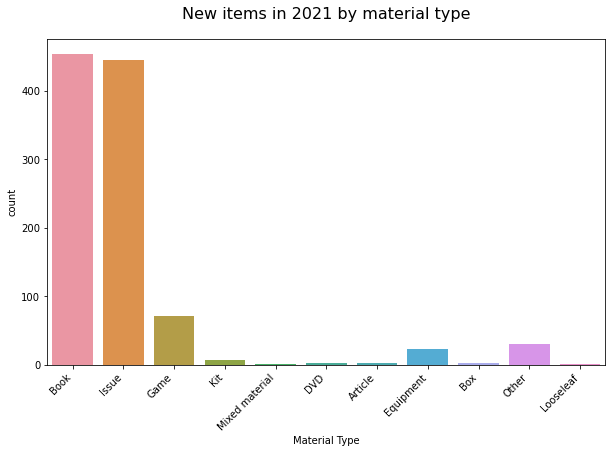

In [80]:
# Définit une figure ainsi que sa taille
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(x=dh['Material Type'])

# Modifie l'orientation des étiquettes et ajuste l'alignement
plt.xticks(rotation=45, ha='right')

_ = plt.title('New items in 2021 by material type', pad=20, fontsize=16)

In [81]:
# Récupère en tant que série le décompte des valeurs
d_material_type = dh['Material Type'].value_counts()
print('Nb total: ', d_material_type.sum())
d_material_type

Nb total:  1041


Book              453
Issue             445
Game               72
Other              30
Equipment          23
Kit                 7
DVD                 3
Article             3
Box                 3
Mixed material      1
Looseleaf           1
Name: Material Type, dtype: int64

In [59]:
# Pour visualiser les données, les types trop rares ne sont pas pertinents et doivent être regroupés sous "Other"
d_material_type_summary = d_material_type.iloc[:5].copy()
d_material_type_summary['Other'] +=  d_material_type.iloc[5:].sum()
print('Nb total: ', d_material_type_summary.sum())
d_material_type_summary

# => Le nombre total est identique

Nb total:  1041


Book         453
Issue        445
Game          72
Other         48
Equipment     23
Name: Material Type, dtype: int64

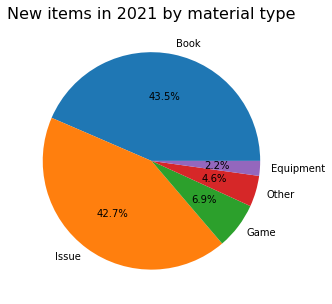

In [79]:
# Création du diagramme en secteurs
fig = plt.figure(figsize=(8, 5))
plt.pie(x=d_material_type_summary, labels=d_material_type_summary.index, autopct='%.1f%%')
_ = plt.title('New items in 2021 by material type', fontsize=16)